In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
tqdm_notebook().pandas()
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
from scipy.stats import ks_2samp
from matplotlib.colors import LogNorm

/home/iakovl0000/anaconda3/envs/stochastic/lib/python3.7/site-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


/home/iakovl0000/anaconda3/envs/stochastic/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
dataset = "somatosensory_converted_into_tpm"
families = "clean_panther4march"

df = pd.read_csv("{}/{}/results/family_IC.csv".format(dataset, families), index_col="family_id")
shuffled_df = pd.read_csv("{}/{}/results/shuffled_family_IC.csv".format(dataset, families), index_col="family_id")
raw_df = pd.read_csv("{}.csv".format(dataset), index_col="gene_id")
family_df = pd.read_csv("{}.csv".format(families))

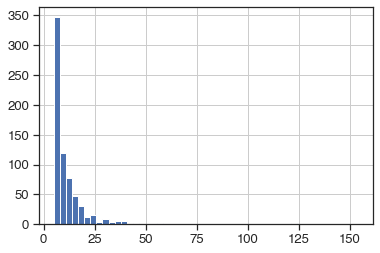

In [4]:
df.family_size.hist(bins=50)

In [5]:
counts = df.family_size.value_counts()
family_sizes = counts[counts >= 30].index

'Family size: 5'

Ks_2sampResult(statistic=0.2701306818181818, pvalue=1.4356205261615008e-11)

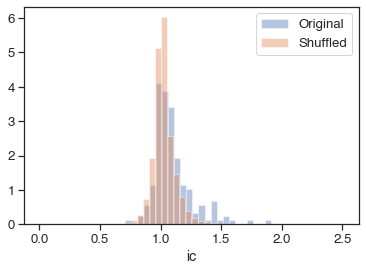

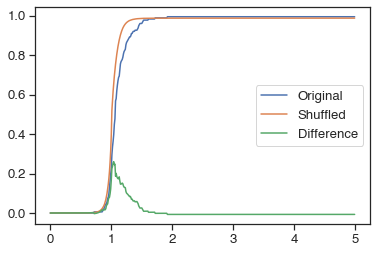

,orig_value,shuffled_value,pvalue
median,1.062043,1.004926,0.000999
percentile_90,1.309398,1.136755,0.000999
percentile_10,0.961090,0.931379,0.012987
percentile_97.5,1.511613,1.233845,0.000999
percentile_02.5,0.885570,0.863225,0.312687
quantile_ratio,1.362409,1.220760,0.000999


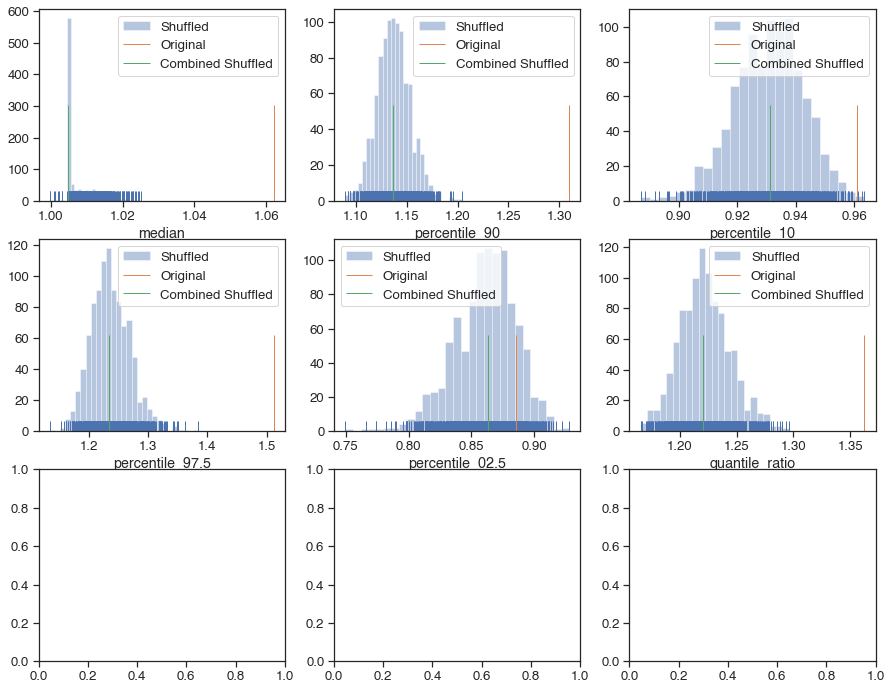

'Family size: 6'

Ks_2sampResult(statistic=0.2734646464646464, pvalue=7.530928255873046e-07)

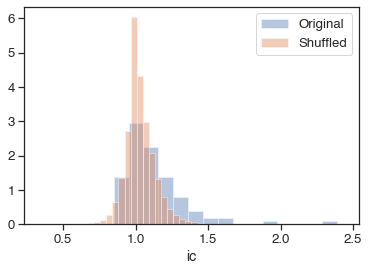

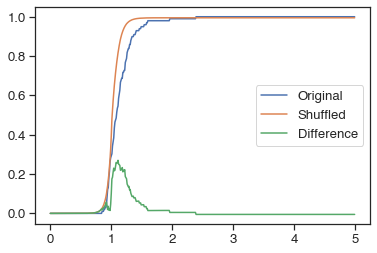

,orig_value,shuffled_value,pvalue
median,1.087753,1.014324,0.000999
percentile_90,1.344264,1.152812,0.000999
percentile_10,0.934621,0.924543,0.435564
percentile_97.5,1.588451,1.248977,0.000999
percentile_02.5,0.906101,0.856776,0.079920
quantile_ratio,1.438297,1.249170,0.000999


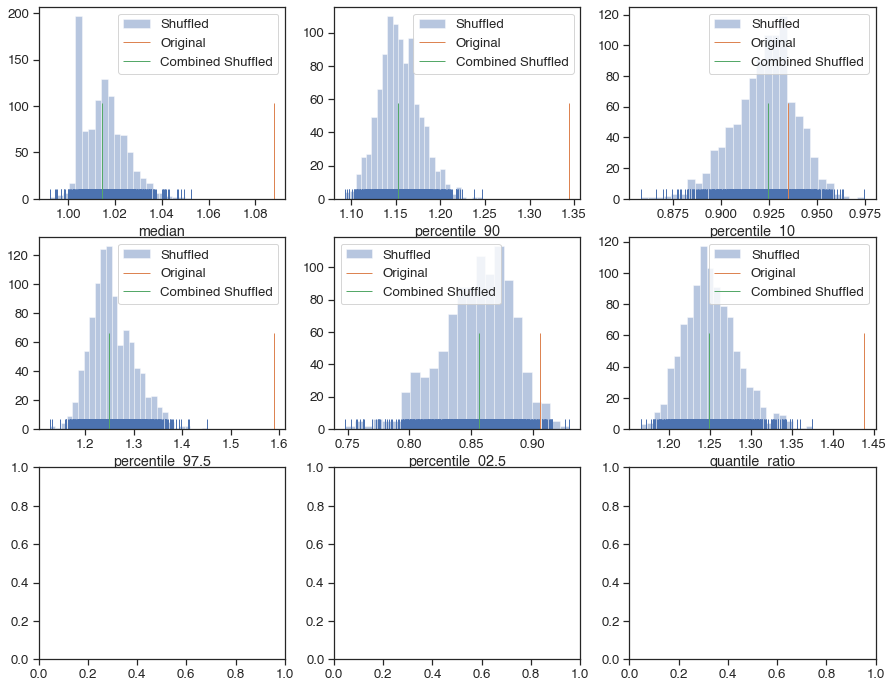

'Family size: 7'

Ks_2sampResult(statistic=0.2294444444444444, pvalue=0.0010280165705705449)

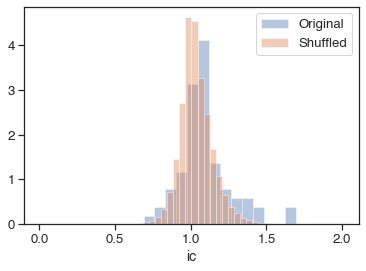

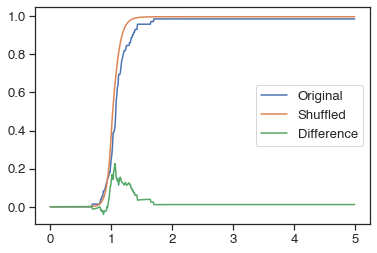

,orig_value,shuffled_value,pvalue
median,1.072239,1.022099,0.000999
percentile_90,1.325647,1.168728,0.000999
percentile_10,0.909406,0.921422,0.560440
percentile_97.5,1.482659,1.265730,0.001998
percentile_02.5,0.823293,0.852823,0.421578
quantile_ratio,1.457706,1.269380,0.000999


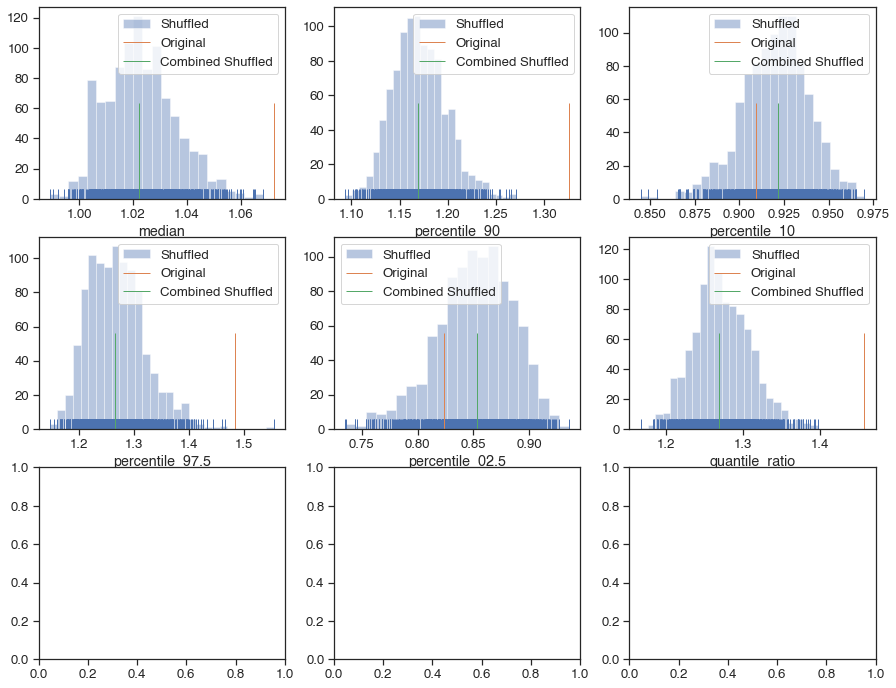

'Family size: 8'

Ks_2sampResult(statistic=0.1758823529411765, pvalue=0.08551117290903201)

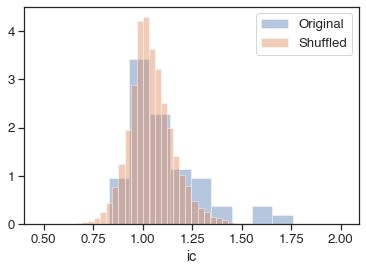

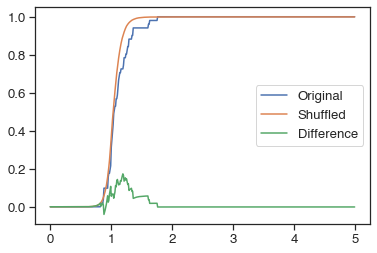

,orig_value,shuffled_value,pvalue
median,1.041059,1.030507,0.585415
percentile_90,1.335679,1.180940,0.000999
percentile_10,0.945264,0.918930,0.239760
percentile_97.5,1.619342,1.276427,0.000999
percentile_02.5,0.865710,0.855591,0.687313
quantile_ratio,1.413022,1.286894,0.012987


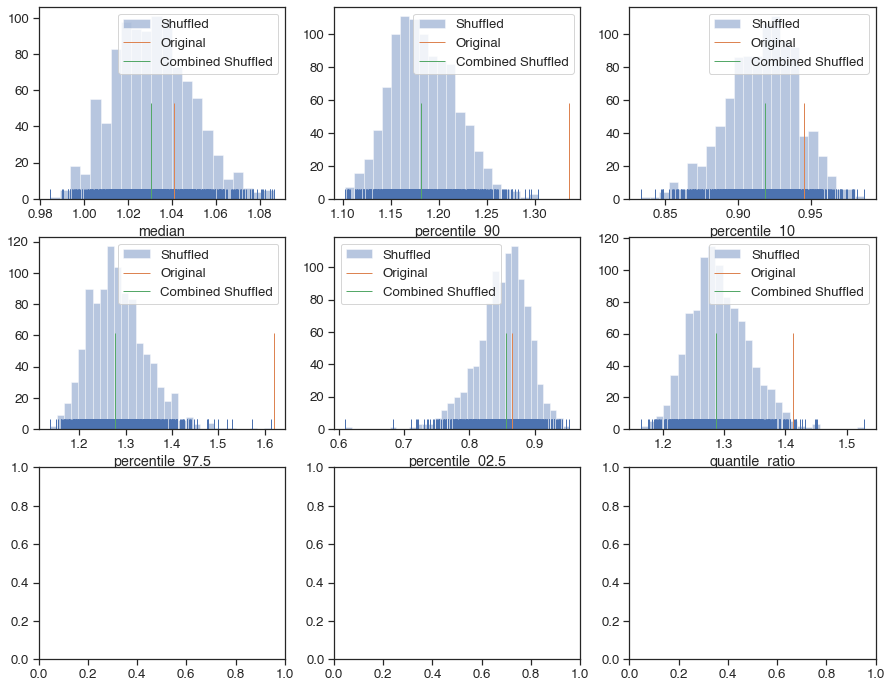

'Family size: 9'

Ks_2sampResult(statistic=0.22030555555555553, pvalue=0.060939309472369294)

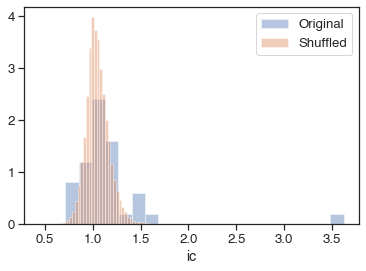

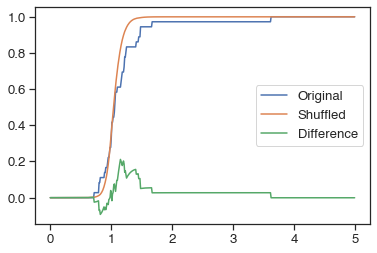

,orig_value,shuffled_value,pvalue
median,1.056110,1.037665,0.408591
percentile_90,1.461757,1.191567,0.000999
percentile_10,0.849154,0.917577,0.012987
percentile_97.5,1.911797,1.280843,0.000999
percentile_02.5,0.787481,0.860486,0.098901
quantile_ratio,1.721426,1.300031,0.000999


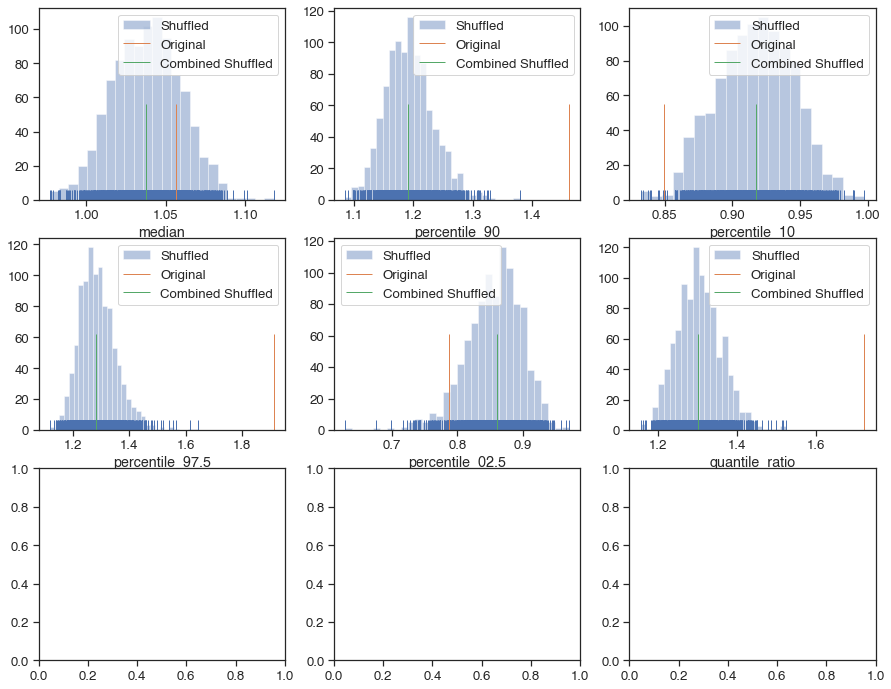

'Family size: 10'

Ks_2sampResult(statistic=0.18753125000000004, pvalue=0.210866254353998)

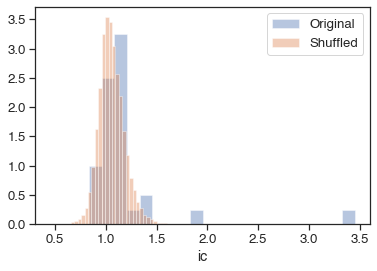

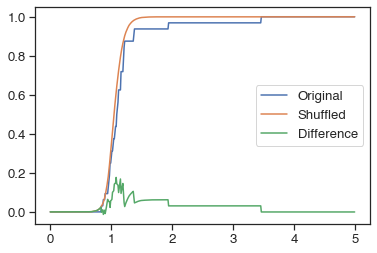

,orig_value,shuffled_value,pvalue
median,1.088860,1.044484,0.086913
percentile_90,1.346705,1.202387,0.005994
percentile_10,0.946886,0.918755,0.353646
percentile_97.5,2.276643,1.295178,0.000999
percentile_02.5,0.857864,0.856832,0.936064
quantile_ratio,1.422246,1.311294,0.086913


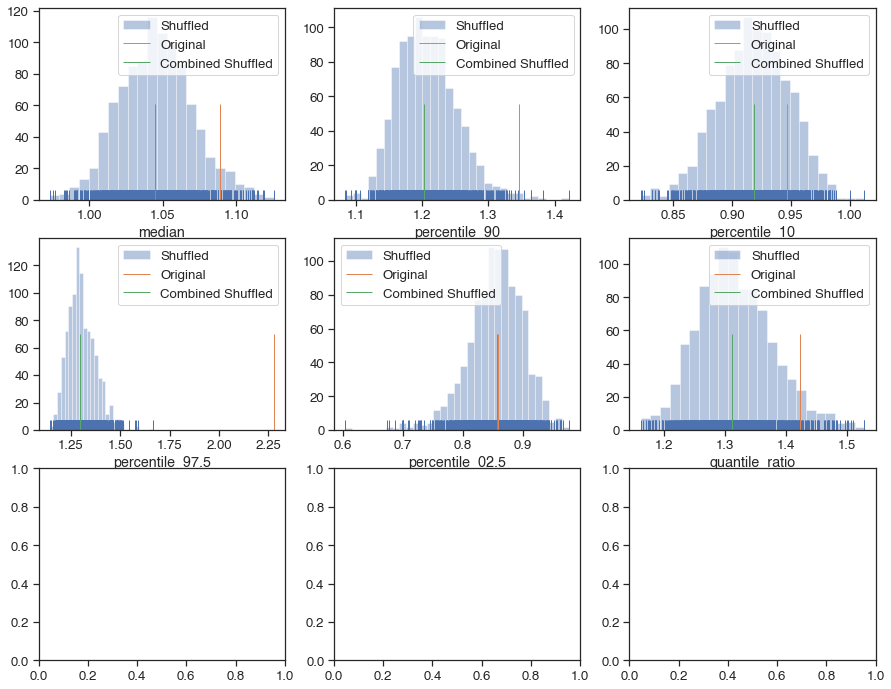

'Family size: 11'

Ks_2sampResult(statistic=0.17396875, pvalue=0.2879690237531288)

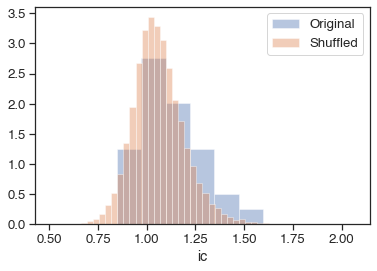

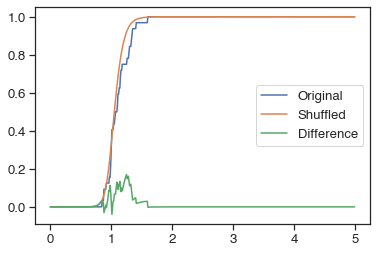

,orig_value,shuffled_value,pvalue
median,1.080611,1.048749,0.220779
percentile_90,1.336059,1.214688,0.014985
percentile_10,0.923429,0.918028,0.815185
percentile_97.5,1.450359,1.311399,0.065934
percentile_02.5,0.866180,0.856578,0.778222
quantile_ratio,1.446846,1.324341,0.066933


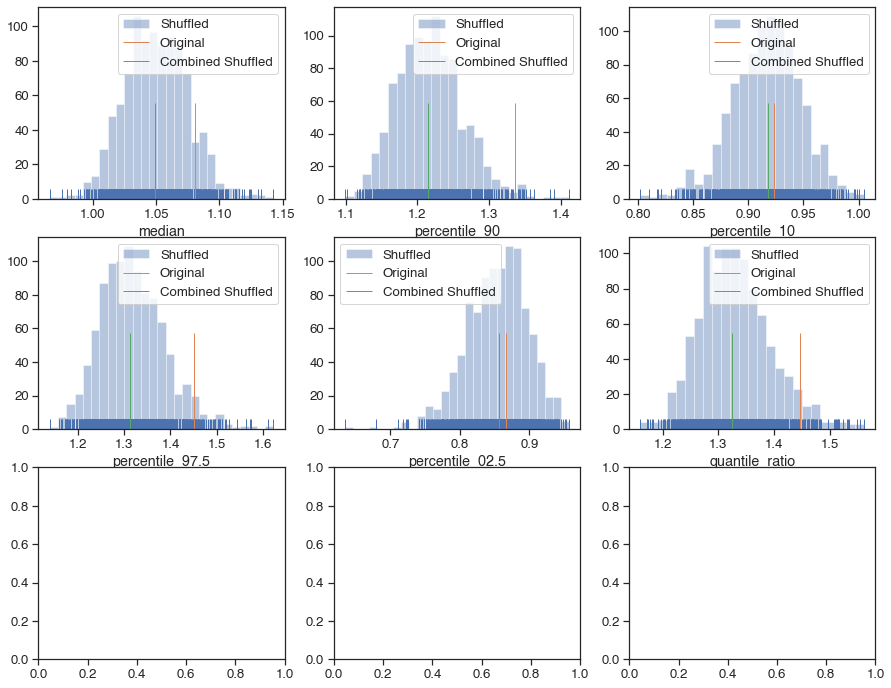

'Family size: 12'

Ks_2sampResult(statistic=0.2589, pvalue=0.03598714417880187)

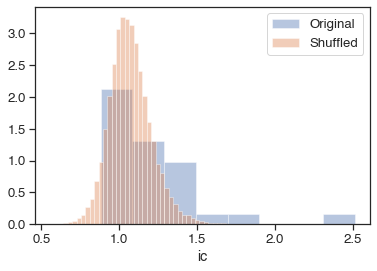

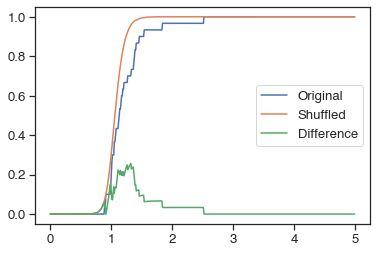

,orig_value,shuffled_value,pvalue
median,1.130557,1.060083,0.011988
percentile_90,1.462226,1.224476,0.000999
percentile_10,0.974130,0.923063,0.121878
percentile_97.5,2.023586,1.322855,0.000999
percentile_02.5,0.896727,0.860051,0.390609
quantile_ratio,1.501058,1.332533,0.014985


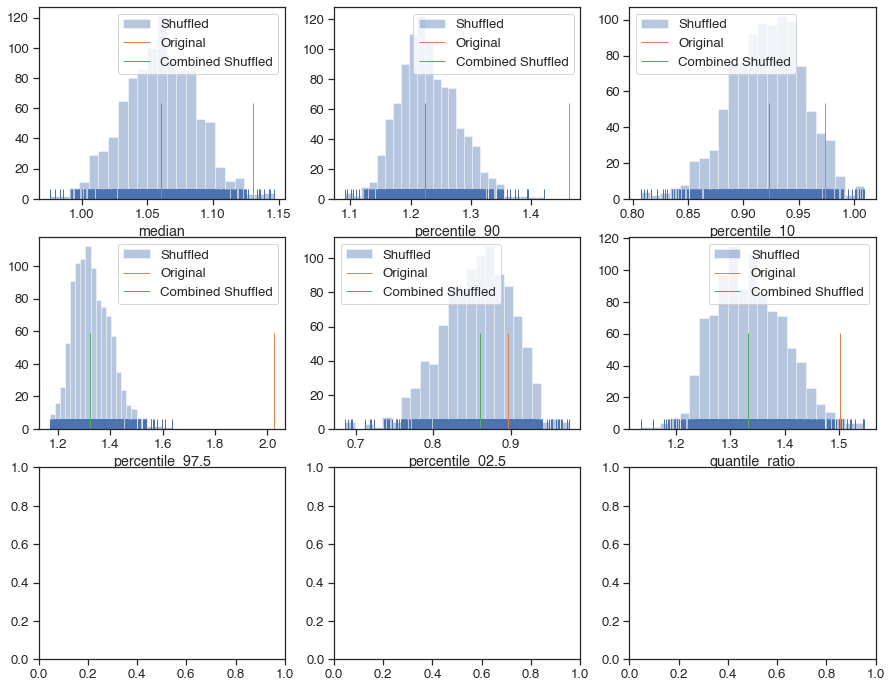

In [6]:
summaries = []

for family_size in family_sizes:
    display("Family size: "+str(family_size))
    orig = df.loc[df.family_size == family_size]
    shuffled = shuffled_df.loc[shuffled_df.family_size == family_size]

    #KS-test
    display(ks_2samp(orig.ic, shuffled.ic))
    sns.distplot(orig.ic.dropna(), norm_hist=True, rug=False, kde=False, label="Original")
    sns.distplot(shuffled.ic.dropna(), norm_hist=True, rug=False, kde=False, label="Shuffled")
    plt.legend()
    plt.show()
    orig_ecdf = ECDF(orig.ic)
    shuffled_ecdf = ECDF(shuffled.ic)
    x = np.arange(0,5,0.01)
    sns.lineplot(x, orig_ecdf(x), label="Original")
    sns.lineplot(x, shuffled_ecdf(x), label="Shuffled")
    sns.lineplot(x, shuffled_ecdf(x) - orig_ecdf(x), label="Difference")
    plt.show()

    #Permutation test
    def get_statistics(df):
        ics = df.ic
        return pd.Series({
            "median": ics.median(),
            "percentile_90": ics.quantile(0.9),
            "percentile_10": ics.quantile(0.1),
            "percentile_97.5": ics.quantile(0.975),
            "percentile_02.5": ics.quantile(0.025),
            "quantile_ratio": ics.quantile(0.9) / ics.quantile(0.1),
#             "skew": ics.skew()
        })
    orig_statistics = get_statistics(orig)
    shuffled_statistics = shuffled.groupby("iteration").progress_apply(get_statistics)
#     total_shuffled_statistic = get_statistics(shuffled) #WRONG, this is not median
    total_shuffled_statistic = shuffled_statistics.median()

#     lower_count = (shuffled_statistics <= orig_statistics).sum()
#     upper_count = (shuffled_statistics >= orig_statistics).sum()
#     lower_pvalue = (lower_count + 1) / (shuffled_statistics.shape[0] + 1)
#     upper_pvalue = (upper_count + 1) / (shuffled_statistics.shape[0] + 1)
    
    shuf_mean = shuffled_statistics.mean(axis=0)
    orig_diff = np.abs(orig_statistics - shuf_mean)
    shuf_diff = shuffled_statistics.subtract(shuf_mean).abs()
    pvalue = ((shuf_diff >= orig_diff).sum(axis=0) + 1) / (shuffled_statistics.shape[0] + 1)
    pvalues = pd.DataFrame({
        "orig_value": orig_statistics,
        "shuffled_value": total_shuffled_statistic,
#         "lower_count": lower_count,
#         "lower_pvalue": lower_pvalue,
#         "upper_count": upper_count,
#         "upper_pvalue": upper_pvalue,
        "pvalue": pvalue,
    })
#     pvalues["significance"] = pvalues.apply(lambda x: "LOWER" if x.lower_pvalue <= 0.025 else ("HIGHER" if x.upper_pvalue <= 0.025 else "-----"), axis=1)

    display(pvalues)
    _, axs = plt.subplots(3,3,figsize=(15,12))
    for ax, statistic in zip(np.array(axs).flatten(), orig_statistics.index):
        sns.distplot(shuffled_statistics[statistic], ax=ax, kde=False, rug=True, label="Shuffled")
        sns.distplot([orig_statistics[statistic]], ax=ax, kde=False, hist=False, rug=True, rug_kws={"height": 0.5}, label="Original")
        sns.distplot([total_shuffled_statistic[statistic]], ax=ax, kde=False, hist=False, rug=True, rug_kws={"height": 0.5}, label="Combined Shuffled")
        ax.legend()
    plt.show()
    
    summaries += [{
        "family_size": family_size,
        "ks": ks_2samp(orig.ic, shuffled.ic),
        "pvalues": pvalues
    }]

In [7]:
x = summaries[0]
def build_row(x):
    l = [x["family_size"], df.loc[df.family_size == x["family_size"]].shape[0], x["ks"].statistic, x["ks"].pvalue]
    l += list(x["pvalues"].loc["quantile_ratio", ["orig_value", "shuffled_value"]].values)
    l += [x["pvalues"].loc["quantile_ratio", "pvalue"]]
    l += list(x["pvalues"].loc["percentile_90", ["orig_value", "shuffled_value"]].values)
    l += [x["pvalues"].loc["percentile_90", "pvalue"]]
    l += list(x["pvalues"].loc["percentile_10", ["orig_value", "shuffled_value"]].values)
    l += [x["pvalues"].loc["percentile_10", "pvalue"]]
    l += list(x["pvalues"].loc["median", ["orig_value", "shuffled_value"]].values)
    l += [x["pvalues"].loc["median", "pvalue"]]
    return pd.Series(l, index=[
        ["", "", "KS", "KS"] + (["Quantile Ratio"] * 3) + (["90%"] * 3) + (["10%"] * 3) + (["Median"] * 3),
        ["Size", "No. Families", "Statistic", "P-value"] + (["Original", "Shuffled", "P-value"] * 4)
    ])
    
summary_table = pd.DataFrame([build_row(x) for x in summaries])#.set_index(("", "Family Size"))
# summary_table.index.name = "Size"
summary_table.loc[:,("","Size")] = summary_table.loc[:,("","Size")].astype(int)
summary_table.loc[:,("","No. Families")] = summary_table.loc[:,("","No. Families")].astype(int)
summary_table.to_csv("{}/family_stat_test_pvalues.csv".format(dataset))
summary_table
# print(summary_table.to_latex(float_format="%.3f", multicolumn_format="c", column_format="|l|rr|rrr|rrr|rrr|rrr|", index=False))
# np.array([0, 1, 2, list(x["pvalues"].loc["median", ["orig_value", "shuffled_value", "lower_pvalue", "upper_pvalue"]].values)])

KS               Quantile Ratio            \
  Size No. Families Statistic       P-value       Original  Shuffled   
0    5          176  0.270131  1.435621e-11       1.362409  1.220760   
1    6           99  0.273465  7.530928e-07       1.438297  1.249170   
2    7           72  0.229444  1.028017e-03       1.457706  1.269380   
3    8           51  0.175882  8.551117e-02       1.413022  1.286894   
4    9           36  0.220306  6.093931e-02       1.721426  1.300031   
5   10           32  0.187531  2.108663e-01       1.422246  1.311294   
6   11           32  0.173969  2.879690e-01       1.446846  1.324341   
7   12           30  0.258900  3.598714e-02       1.501058  1.332533   

                  90%                           10%                      \
    P-value  Original  Shuffled   P-value  Original  Shuffled   P-value   
0  0.000999  1.309398  1.136755  0.000999  0.961090  0.931379  0.012987   
1  0.000999  1.344264  1.152812  0.000999  0.934621  0.924543  0.435564   
2  0.000999  1.325647  1.168728  0.000999  0.909406  0.921422  0.560440   
3  0.012987  1.335679  1.180940  0.000999  0.945264  0.918930  0.239760   
4  0.000999  1.461757  1.191567  0.000999  0.849154  0.917577  0.012987   
5  0.086913  1.346705  1.202387  0.005994  0.946886  0.918755  0.353646   
6  0.066933  1.336059  1.214688  0.014985  0.923429  0.918028  0.815185   
7  0.014985  1.462226  1.224476  0.000999  0.974130  0.923063  0.121878   

     Median                      
   Original  Shuffled   P-value  
0  1.062043  1.004926  0.000999  
1  1.087753  1.014324  0.000999  
2  1.072239  1.022099  0.000999  
3  1.041059  1.030507  0.585415  
4  1.056110  1.037665  0.408591  
5  1.088860  1.044484  0.086913  
6  1.080611  1.048749  0.220779  
7  1.130557  1.060083  0.011988

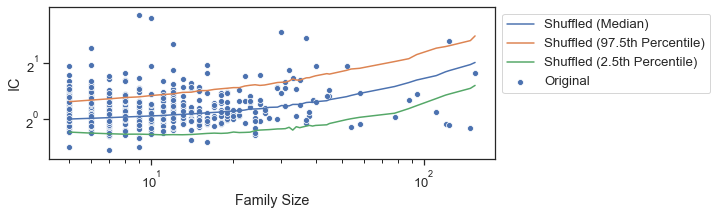

In [21]:
sns.set(font_scale=1.2, style="ticks", font="Arial")
shuffled_statistics = shuffled_df.groupby("family_size").apply(get_statistics)
plt.figure(figsize=(8,2.8))
sns.scatterplot(data=df, x="family_size", y="ic", label="Original")
sns.lineplot(shuffled_statistics.index, shuffled_statistics["median"], label="Shuffled (Median)")
sns.lineplot(shuffled_statistics.index, shuffled_statistics["percentile_97.5"], label="Shuffled (97.5th Percentile)")
# sns.lineplot(shuffled_statistics.index, shuffled_statistics.percentile_90, label="Shuffled 90%")
# sns.lineplot(shuffled_statistics.index, shuffled_statistics.percentile_10, label="Shuffled 10%")
sns.lineplot(shuffled_statistics.index, shuffled_statistics["percentile_02.5"], label="Shuffled (2.5th Percentile)",)
plt.ylabel("IC")
plt.xlabel("Family Size")
plt.yscale("log",basey=2)
plt.xscale("log")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()
# shuffled_statistics